In [8]:
from IPython.display import HTML

HTML('''<script>
code_show=true;
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [7]:
%%html
<a href="CF.html" target="_self">Collaborative Filtering</a>&nbsp&nbsp&nbsp
<a href="MF.html" target="_self">Matrix Factorization</a>&nbsp&nbsp&nbsp
<a href="HB.html" target="_self">Hybrid Model</a>&nbsp&nbsp&nbsp
<a href="Con.html" target="_self">Conclusion</a>&nbsp&nbsp&nbsp

## Introduction

- [1.1 Motivation](#Motivation)
- [1.2 Goal](#Goal)
- [1.3 Literature Review](#Literature-Review)
- [1.4 Data Exploration](#Data-Exploration)
- [1.5 Models Overview](#Models-Overview)
- [1.6 Reference](#Reference)

People are usually open to recommendations, they could be for food places, movies, or places to visit. A good recommendation system would mean huge business opportunity, where customers are more likely to increase their spending when recommendation is done right. Recommendation systems are prevalent in almost all of our daily lives: item recommendation when shopping on Amazon, movies recommendation on Netflix and various platforms like Rotten Tomatoes, song recommendation on music streaming services like Spotify. 

<img src="compiled.png"> 
*Recommendation systems are used commonly in the everyday services that we use. *

## Motivation

As consumers ourselves, we are intrigued by the different approaches present in recommendation systems. The commonly quoted \$1million Netflix prize is an example of the relentless strive towards a better recommendation system for customers. We would like to look into the data of user reviews and ratings and create a recommendation system that can predict user preferences on unrated items. We particularly are interested in movie reviews as the data available are rich and they contain both numeric ratings and textual recommendation. 

## Goal

As such, our goal is to develop a recommendation system to predict ratings that users will assign to movies based on past rating history, and subsequently recommend movies to these users.

## Literature Review

From our research, there are several categories of algorithms used in recommender systems: 1) Collaborative Filtering (examples: Nearest neighbors, Matrix Factorization, Restricted Boltzmann Machines), 2) Content-aware Recommendations (examples, Tensor Factorization, Factorization Machines), 3) Deep Learning, 4) Hybrid approaches.

With reference to this step-by-step guide from [website](http://www.salemmarafi.com/) by S.Marafi, item-based filtering in Collaborative Filtering (CF) shows similarities between items’ consumption histories. With the item similarity matrix from item-based filtering, user-based filtering can be applied. User-based CF includes the user consumption histories as well. However, with the presence of huge datasets, CF might not be viable because of the inherent high time complexity to generate the similarity matrix. 

In this [article](www.analyticsvidhya.com/blog/2015/08/beginnersguidelearncontent), content based recommendation system is introduced. The goal of Content Based Recommendation System is to determine the relative importance of an item. Term Frequency (TF), which the frequency of a word in a document. Inverse Document Frequency (IDF) is the inverse of the document frequency among the whole corpus of documents. TF-IDF weighting is used to negate the effect of high frequency words in determining the importance of an item (document). 
Vector Space Model is often used to compute the proximity based on the angle between the vectors. Each item is stored as a vector of its attributes (which are also vectors) in an n-dimensional space. Then, the vectors have to be normalized and then take the sum-product of them, which is the cosine of the angle between the vectors. If the value of cosine increases, then the value of the angle decreases, which signifies more similarity.

This [article](http:// netflixprize.com/assets/GrandPrize2009_BPC_BellKor.pdf) on the BellKor solution to the Netflix Grand Prize also offers a glimpse into the winning in the Netflix competion. CF was discussed. In addition to that, temporal dynamics of baseline predictors (predictors related to effects associated to either users or movies independent of their interaction) are also modeled.

Another effect for baseline predictors is the changing scale of user ratings over time.

In this paper, it is highlighted that one important metric, frequencies (eg. the number of ratings a user gives on a specific day) is more helpful when used with movie-related but not with user-related parameters. In case of bulk ratings, long after watching an all-time favourite movie, only those with positive approach will mark them as favorites while those disliking them will not mention them. Same is the case with not so good movies.

This paper also discusses sophisticated blending schemes (which combine multiple predictors into a single final solution) as a key for very accurate results. Blending touches many predictors , rather than improving one at a time and is good at handling skewed variables without transformations. Clustering of users/movies having similarity also proves to be beneficial in producing results. 


## Data Exploration

<img src="combinedwordcloud.png"> 
We use Amazon Movie and TV review data compiled by Julian McAuley from UC San Diego.1 While we
figure out a feasible method to store and process this dataset, we will work on a subset of the data for
exploratory purposes. This subset consists of 1.698 million user reviews (which can still be processed on
our personal computers at the expense of a whopping 4.5 GB of RAM), each of which is accompanied by
the following information:
1. reviewerID : ID of the reviewer
2. asin : ID of the product
3. reviewerName : name of the reviewer
4. helpful : helpfulness rating of the review
5. reviewText : text of the review
6. overall : rating of the product
7. summary : summary of the review
8. unixReviewTime : time of the review in unix time
9. reviewTime : time of the review in raw format
Specific data on the movies, cast, director, year of release, etc., are contained in some other dataset. We
checked for missing values and observer that except reviewer name , no other column has missing values.
The following file removes duplicates more aggressively, removing duplicates even if they are written by
different users.

**Ratings**
We examine the distribution of the ratings (1-5) in this section. Figure 1 below shows the histograms of
ratings. We see that a large portion of the ratings in our dataset is '5', and there are fewer reviews for
lower ratings.

Figure 2 contains histograms of the average ratings by a user (each user rates more than one movie in
the dataset) and of the average ratings for a movie (each movie is rated more than once). We see that
average ratings in both cases are near 4 and 5.

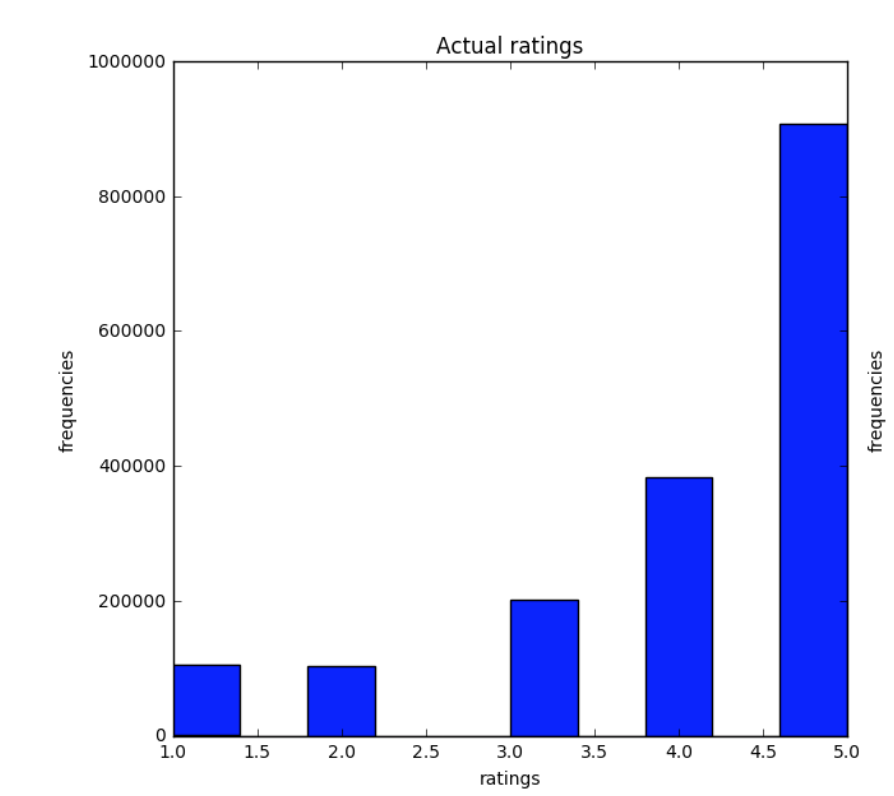

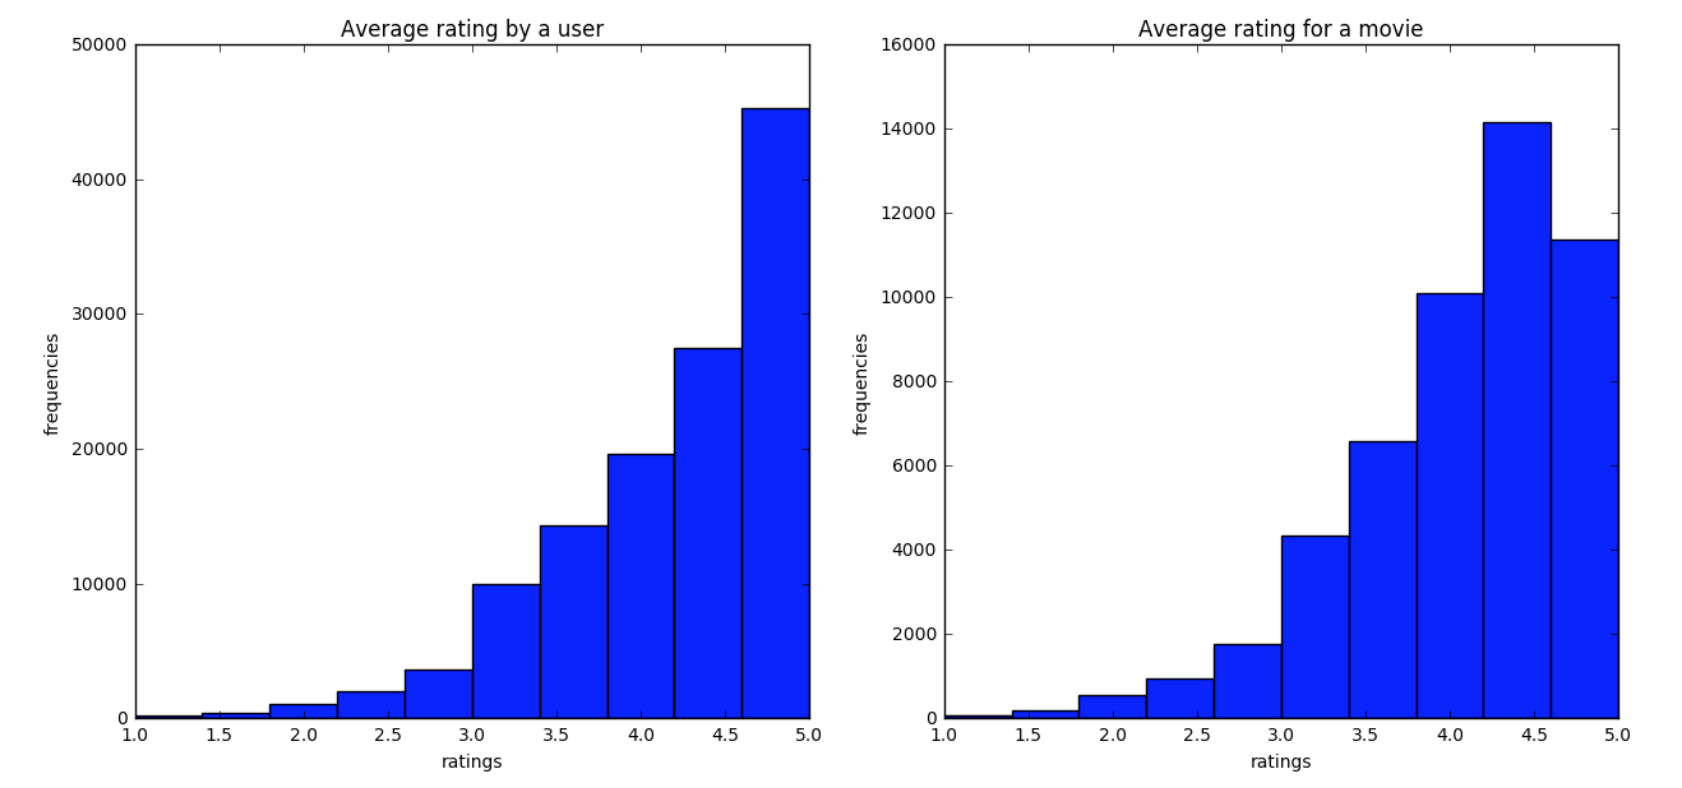

In [1]:
from IPython.display import Image
from IPython.display import display
z = Image(filename='actualrating.png', width = 500, height = 500) 
y = Image(filename='average_rating.png', width = 500, height = 500) 
display(z,y)

**Helpfulness**
Users of Amazon have the option to vote whether a particular review is \helpful" or not. In this section, we
examine the \helpfulness score" (the fraction of Amazon users who deemed a particular review as \helpful")
of the movie reviews, grouped by rating. In the leftmost plot of Figure 3, we show the percentage of movies
in each rating category with at least 1 \helpful" vote (whether yes or no). We observe that these percentages
are higher for reviews with poorer ratings. In the rightmost plot of Figure 3, we display the mean number
of users who voted whether a review was helpful or not (cyan), as well as the mean number of users who
considered the review helpful. We see that more than half the total number of votes for reviews with rating
1 were considered \not helpful" by Amazon users. Typically, the higher the rating, the larger the fraction
of votes that were \helpful."

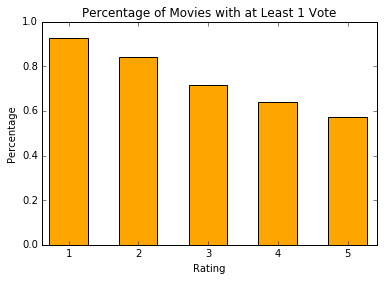

In [2]:
from IPython.display import Image
from IPython.display import display
z = Image(filename='fig_helpful2.png', width = 500, height = 500) 
display(z)

**Review Text Summary**
The summary is a cleaned and shorter version of reviewText. We use text from the review summary to
and the most frequently occurring words in the reviews for each rating.
Frequencies of words were inspected in the textual reviews and they were grouped by their respective ratings. The figure on the most left is for ratings of 1, and the rating increases to the right to 5. 

We see that highly rated reviews contain both words with highly positive sentiments (great and good) while lowly rated reviews contain words with mostly negative sentimenets (bad, boring, disappointing, worst).



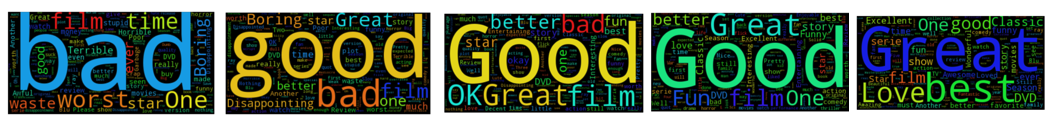

In [3]:
from IPython.display import Image
from IPython.display import display
z = Image(filename='combinedwordcloud.png') 
display(z)

**Review Length**
Figure 5 above shows the distribution of the number of words in the reviews. The lengths range from 1 to
6105 words, and the mean length per review is 164.30 words.

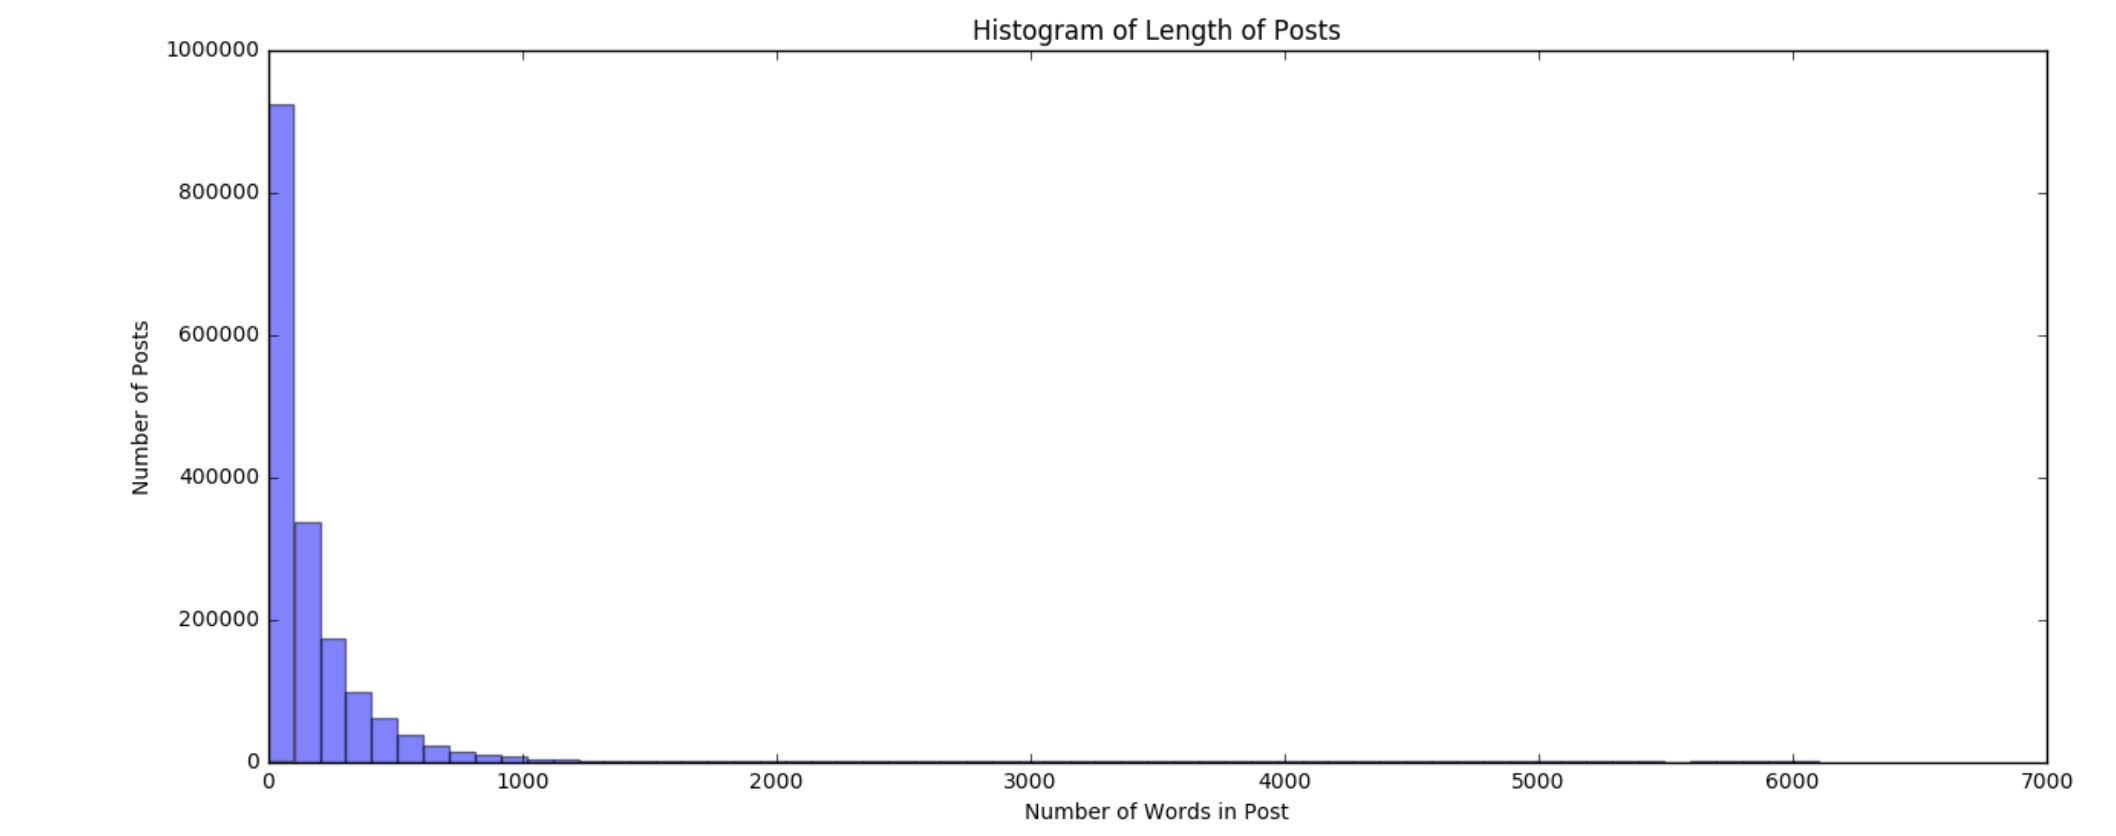

In [4]:
from IPython.display import Image
from IPython.display import display
z = Image(filename='postlength.png') 
display(z)

## Models Overview

Recommender systems generally fall under two categories: **content-based systems** and **collaborative filtering systems**.

In content-based systems, profiles are constructed for each item in the dataset. These profiles are determined by selected features that the items possess. For instance, in the case of movies, we could construct profiles based on the genre, director, and cast of the movies. Then, if some user has rated movie $x$ highly, and if movies $x$ and $y$ are deemed similar based on their constructed profiles, the content-based system would then recommend movie $y$ to the user.

Content-based systems are often criticized for not taking advantage of the wealth of information provided by the data samples at hand (in our case, the number of movie reviewers). 
Collaborative filtering models are of two categories- **neighbourhood based**(which uses user-user interaction or movie similarity) models and **latent feature** based models(which uses matrix factorization).
Collaborative filtering systems(neighbourhood based) mitigate the aforementioned issue by incorporating the ratings and reviews of each user to build a similarity matrix between users. Then, using the k-nearest neighbors approach, the system predicts the rating that a particular user would assign to a given item based on his or her similarity measure between other uses in the dataset. Heuristically, collaborative filtering employs the wisdom of the crowd, making use of more information available from our given dataset. 

Matrix factorization technique is a recommender system technique that discovers and utilises the latent features underlying the interactions between the users and movies. Matrix factorization method is an approach that tries to explain ratings by characterizing both users and movies from rating patterns. 

The following figure explains the different types of recommender systems:


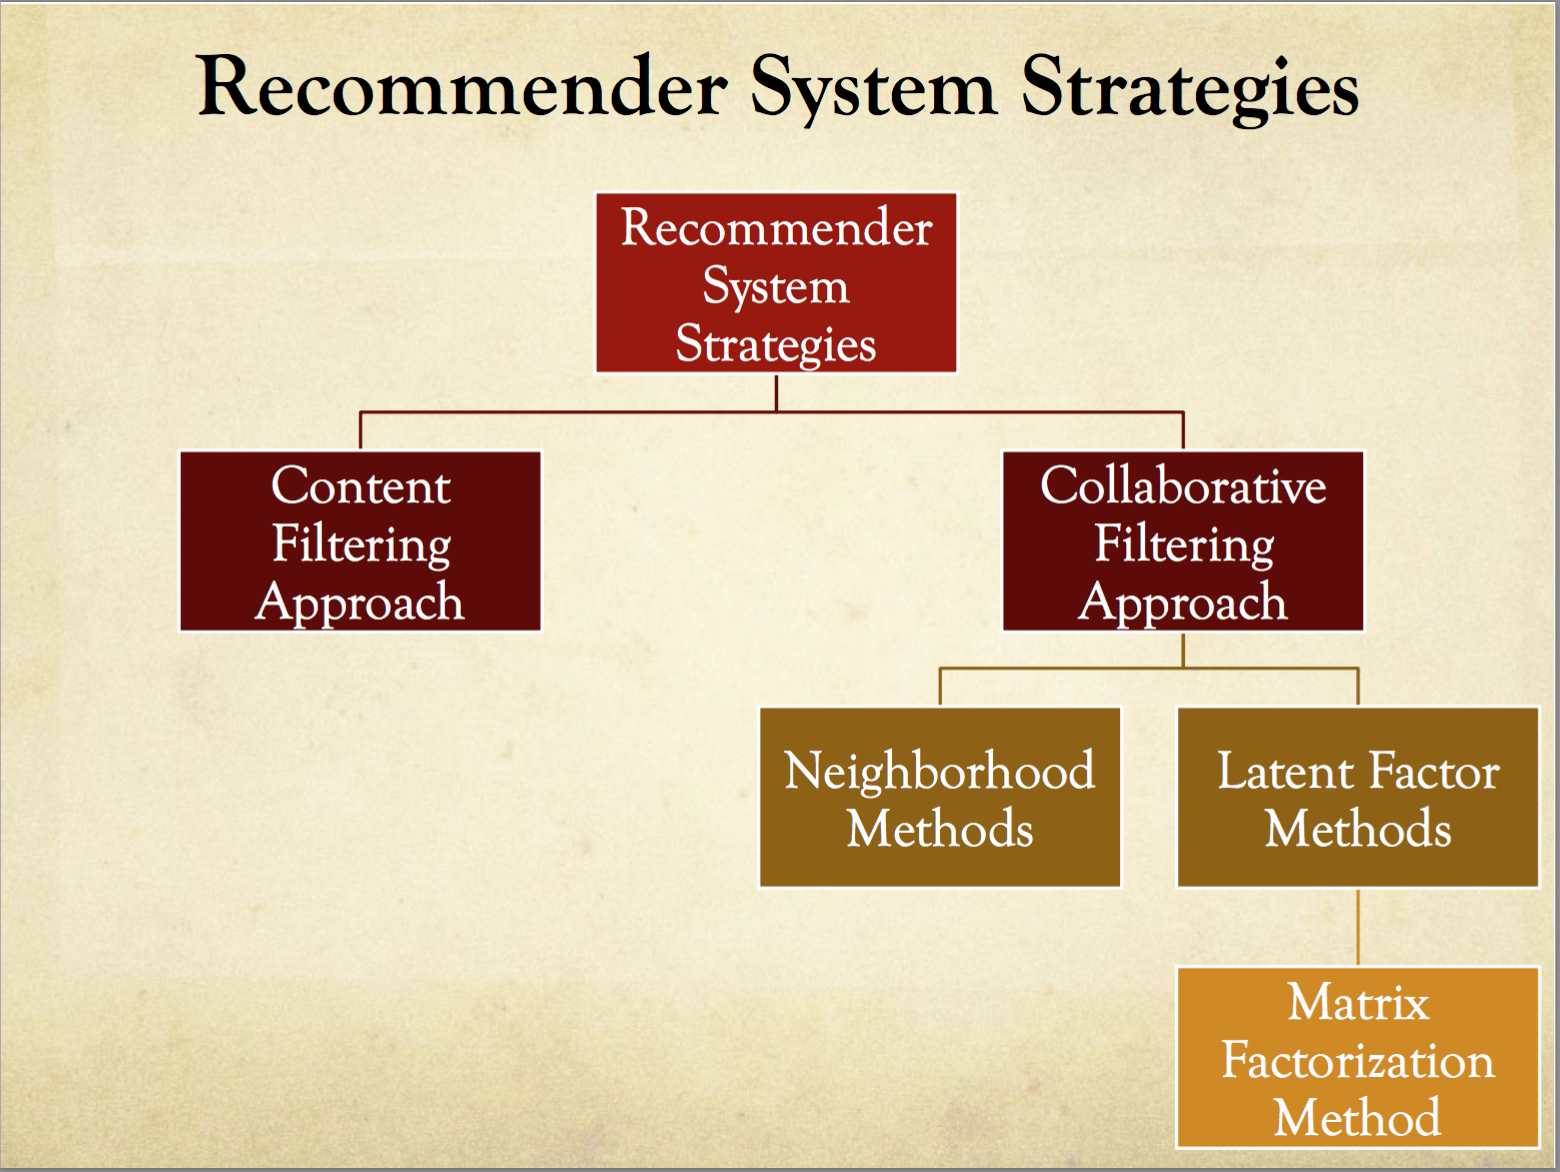

In [5]:
from IPython.display import Image
from IPython.display import display
z = Image(filename='chinRS.png', width = 500, height = 500) 
display(z)

### Reference

1. S.Marafi, "Python Collaborative Filtering Example", 
www.salemmarafi.com/code/collaborativefilteringwithpython/

2. Analytics Vidhya, "High Level Overview of Content Based Recommendations", 
www.analyticsvidhya.com/blog/2015/08/beginnersguidelearncontentbasedrecommendersystems/

3. Y.Koren, "Netflix Prize", http://
netflixprize.com/assets/GrandPrize2009_BPC_BellKor.pdf